# **Projet CENSE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/My\ Drive/project/scenes_stereo.zip .
!unzip scenes_stereo.zip

Archive:  scenes_stereo.zip
   creating: scenes_stereo/
  inflating: scenes_stereo/bus01.wav  
  inflating: scenes_stereo/bus02.wav  
  inflating: scenes_stereo/bus03.wav  
  inflating: scenes_stereo/bus04.wav  
  inflating: scenes_stereo/bus05.wav  
  inflating: scenes_stereo/bus06.wav  
  inflating: scenes_stereo/bus07.wav  
  inflating: scenes_stereo/bus08.wav  
  inflating: scenes_stereo/bus09.wav  
  inflating: scenes_stereo/bus10.wav  
  inflating: scenes_stereo/busystreet01.wav  
  inflating: scenes_stereo/busystreet02.wav  
  inflating: scenes_stereo/busystreet03.wav  
  inflating: scenes_stereo/busystreet04.wav  
  inflating: scenes_stereo/busystreet05.wav  
  inflating: scenes_stereo/busystreet06.wav  
  inflating: scenes_stereo/busystreet07.wav  
  inflating: scenes_stereo/busystreet08.wav  
  inflating: scenes_stereo/busystreet09.wav  
  inflating: scenes_stereo/busystreet10.wav  
  inflating: scenes_stereo/office01.wav  
  inflating: scenes_stereo/office02.wav  
  inflatin

In [ ]:
!pip3 uninstall tensorflow-gpu -y
!pip3 uninstall tensorflow -y
!pip install "tensorflow-gpu<1.14"
!pip3 install openl3
!pip3 install soundfile

Uninstalling tensorflow-gpu-1.13.2:
  Successfully uninstalled tensorflow-gpu-1.13.2
Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
  Using cached https://files.pythonhosted.org/packages/63/e5/6f47e0e3b8e9215efb3f41692ab47991d96cb3ccc172cb578435cbcb4959/tensorflow_gpu-1.13.2-cp36-cp36m-manylinux1_x86_64.whl


#  Import Libraries

In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import openl3
import soundfile as sf
import tensorflow as tf

# Preprocessing

In [ ]:
#set directory for source files 
data_dir = './scenes_stereo/'
audio_files = glob(data_dir + '*.wav')
print('file size:',len(audio_files))

file size: 100


In [ ]:
data_list = glob(data_dir+"/*")
data_audio = []
data_sr = []
data_emb = []
data_ts = []
print('datalist file:',data_list)

all_labels = {'bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation'}

for name in ['bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation']:
    for k in range(1,10):
      audio, sr = sf.read(data_dir+name + '0'+str(k)+'.wav')
      emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=6144, hop_size=0.022799)
      data_sr.append(sr)
      data_emb.append(emb)
      data_ts.append(ts)

    audio, sr = sf.read(data_dir+name + '10.wav')
    emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=6144, hop_size=0.022799)
    data_sr.append(sr)
    data_emb.append(emb)
    data_ts.append(ts)

datalist file: ['./scenes_stereo/restaurant10.wav', './scenes_stereo/tubestation10.wav', './scenes_stereo/restaurant04.wav', './scenes_stereo/park10.wav', './scenes_stereo/quietstreet10.wav', './scenes_stereo/busystreet01.wav', './scenes_stereo/busystreet04.wav', './scenes_stereo/bus09.wav', './scenes_stereo/tubestation08.wav', './scenes_stereo/tubestation05.wav', './scenes_stereo/supermarket08.wav', './scenes_stereo/tube07.wav', './scenes_stereo/supermarket10.wav', './scenes_stereo/restaurant05.wav', './scenes_stereo/park09.wav', './scenes_stereo/park07.wav', './scenes_stereo/busystreet05.wav', './scenes_stereo/supermarket07.wav', './scenes_stereo/bus04.wav', './scenes_stereo/quietstreet05.wav', './scenes_stereo/busystreet08.wav', './scenes_stereo/restaurant06.wav', './scenes_stereo/openairmarket06.wav', './scenes_stereo/quietstreet02.wav', './scenes_stereo/tubestation06.wav', './scenes_stereo/bus10.wav', './scenes_stereo/tube01.wav', './scenes_stereo/office09.wav', './scenes_stereo/b

In [ ]:
data_emb1=[]
for i in range(0,100):
   data_emb1.append(np.transpose(data_emb[i]))

In [ ]:
 
#data_sr 
#data_emb 
#data_ts

In [ ]:
print (data_emb1[1:100])
import pickle

with open("data_emb.txt", "wb") as fp:   
  pickle.dump(data_emb, fp)

[array([[2.3293843, 2.288161 , 2.3227985, ..., 1.7291424, 1.787431 ,
        1.694017 ],
       [3.5418868, 3.4044101, 3.4236763, ..., 3.1189003, 2.9879744,
        3.1076927],
       [3.2499619, 3.2557101, 3.2608259, ..., 2.7879574, 2.774649 ,
        2.8016176],
       ...,
       [2.7266338, 2.7622426, 2.7094207, ..., 2.5611086, 2.584127 ,
        2.5461755],
       [2.2812371, 2.1673539, 2.1504946, ..., 2.3242505, 2.3337789,
        2.3592722],
       [1.8282709, 1.9445983, 1.8659993, ..., 1.9629256, 2.057061 ,
        2.012308 ]], dtype=float32), array([[2.1365893, 2.0855415, 2.11593  , ..., 2.1009233, 2.1051023,
        2.1039436],
       [2.2423115, 2.4605942, 2.4752152, ..., 2.2742517, 2.4184465,
        2.4761007],
       [3.2558308, 3.26058  , 3.2680662, ..., 2.4945266, 2.471245 ,
        2.486498 ],
       ...,
       [2.8066235, 2.8004494, 2.783707 , ..., 2.9052293, 2.8710988,
        2.8909514],
       [1.6735219, 1.7361583, 1.7183456, ..., 2.0881014, 2.116312 ,
        2.

In [ ]:
import numpy as np
#np.reshape('data.npz', data)
np.savez('data_emb.npz', data_emb=data_emb)

In [ ]:
data_emb1[0].shape

(6144, 1296)

In [ ]:
np.mean(data_emb1[0],axis=1).shape

(6144,)

In [ ]:
labels = [] # Labels des échantillons
for k in range(10):
    labels = labels+[k]*10
dict_labels = {'bus':0,'busystreet':1,'office':2,'openairmarket':3,'park':4,'quietstreet':5,'restaurant':6,'supermarket':7,'tube':8,'tubestation':9} 

# Texture window


In [ ]:
def wind_texture(M,wsize):
    
    n,m = M.shape
    nwind = m//wsize
    
    W = np.zeros((n,nwind))
    
    for i in range (nwind):
        W[:,i] = np.mean(M[:,i*wsize:(i+1)*wsize],axis=1)
    
    return(W)

# RbQ-c Approximate

In [ ]:
def dist_wind_approximate(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.zeros((m,1))
    
    for k in range(m):
        distxy[k] = np.linalg.norm(x[:,k]-y[:,k])

    return min(distxy)

In [ ]:
def p_at_k(mat_dist,K=5,labels=labels):
    p5 = np.zeros(100)
    for k in range(100):
        dist = mat_dist[k,:]
        distsort = np.argsort(np.ravel(dist))

        p5[k] = np.sum([labels[distsort[i]]==labels[k] for i in range(1,K+1)])/K
    return(np.mean(p5))

In [ ]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0


for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind_approximate(data_emb1[i],data_emb1[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

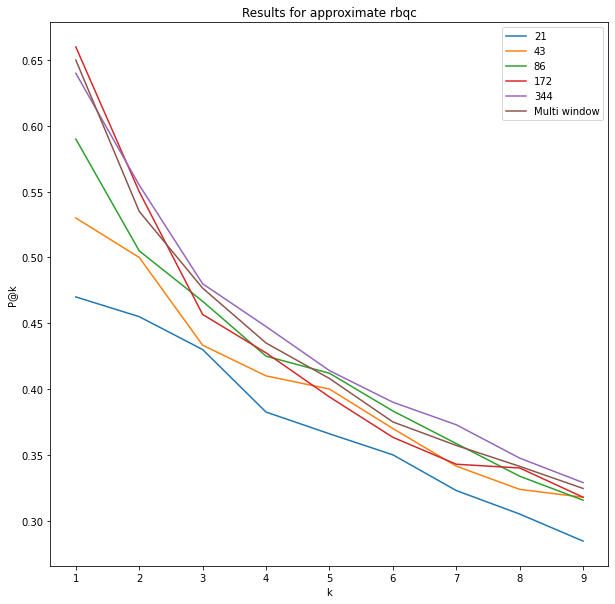

In [ ]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for approximate rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [ ]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.366
for window size =  43
k=   4 0.40000000000000013
for window size =  86
k=   4 0.4120000000000001
for window size =  172
k=   4 0.3940000000000001
for window size =  344
k=   4 0.41400000000000003
For multi 
k= 5  0.40800000000000014


# RbQ-c Complete

In [ ]:
def dist_wind(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.float('Inf')
    
    for k in range(m):
        distxy = min(distxy, min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1)))

    return distxy

In [ ]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0

for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind(data_emb1[i],data_emb1[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

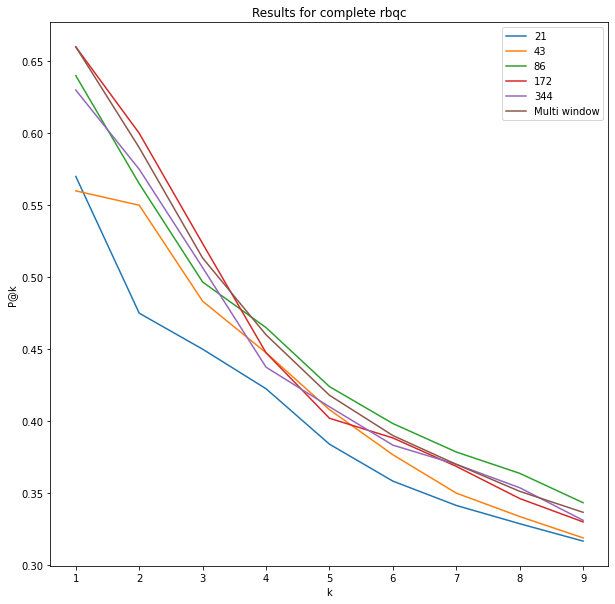

In [ ]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for complete rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [ ]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.3840000000000001
for window size =  43
k=   4 0.40800000000000003
for window size =  86
k=   4 0.42400000000000004
for window size =  172
k=   4 0.4020000000000001
for window size =  344
k=   4 0.41
For multi 
k= 5  0.41800000000000004


# Early integration

In [ ]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precisionEarly = np.zeros(9)
num=0
for i in range(100):
    for j in range(i,100):
      mat_dist[n, i,j] = np.linalg.norm(np.sum(data_emb1[i], axis=1) - np.sum(data_emb1[j], axis=1))

      mat_dist[n, j,i] = mat_dist[n, i,j]

for k in range(1,10):
        precisionEarly[k-1] = p_at_k(mat_dist.sum(axis=0),k)

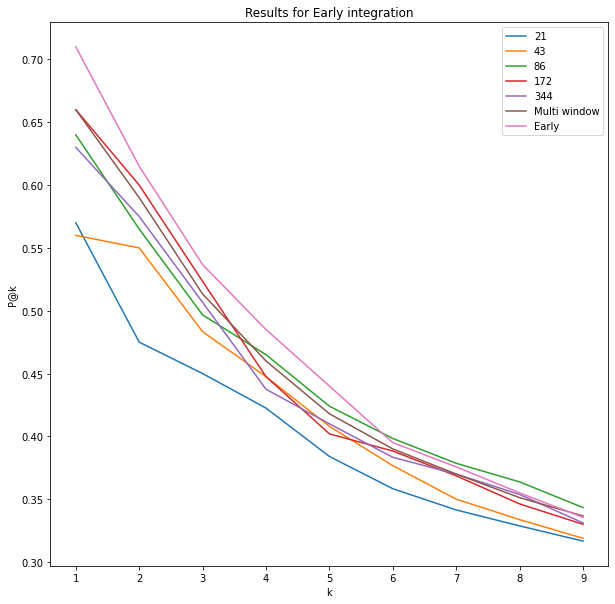

In [ ]:
plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.plot(range(1,10),precisionEarly,label = 'Early')
plt.title('Results for Early integration')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [ ]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])
print("For early ")
print("k= 5 ",  precisionEarly[4])

for window size =  21
k=   4 0.3840000000000001
for window size =  43
k=   4 0.40800000000000003
for window size =  86
k=   4 0.42400000000000004
for window size =  172
k=   4 0.4020000000000001
for window size =  344
k=   4 0.41
For multi 
k= 5  0.41800000000000004
For early 
k= 5  0.44000000000000006
